<h1><justify> MULTICLASS CLASSIFICATION </justify></h1>
<h3> Multiclass classification to detect types of species with support vector machines and stochastic gradient descent classifiers</h3> 

<h1> Import the Libraries</h1>

In [936]:
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve,auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
import sys
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy
from sklearn.model_selection import cross_val_predict
numpy.set_printoptions(threshold=sys.maxsize)
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import  StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import mean_absolute_error
import plotly.express as px
from numpy import mean
from numpy import std
from sklearn import datasets


<h1> Load dataset</h1>

In [937]:
data = datasets.load_iris(as_frame=True)

In [938]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [939]:
data.frame.target = data.frame.target.replace([0,1,2], ['setosa','versicolor','virginica']) 

In [940]:
data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<h1> Summary statistics</h1>

In [941]:
data.frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [942]:
data.frame.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [943]:
data.frame.shape

(150, 5)

In [944]:
data.target.shape

(150,)

<h1> Check if the data is balance</h1>

Text(0.5, 0, 'Species')

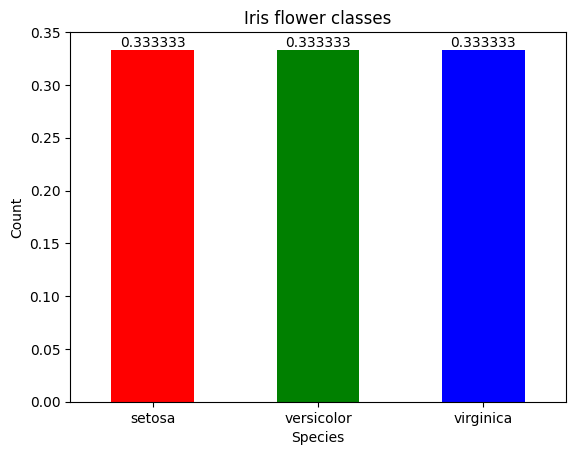

In [945]:
frequency = pd.Series(data.frame.target.value_counts(normalize=True).sort_index())
fig = frequency.plot(kind ='bar',color=['red','green','blue']) 
fig.bar_label(fig.containers[0])
plt.xticks(rotation = 0)
plt.title('Iris flower classes')
plt.ylabel('Count')
plt.xlabel('Species') 

Wow! the classes for the target variable are balance,pretty cool for classification

<h1> View distribution</h1>

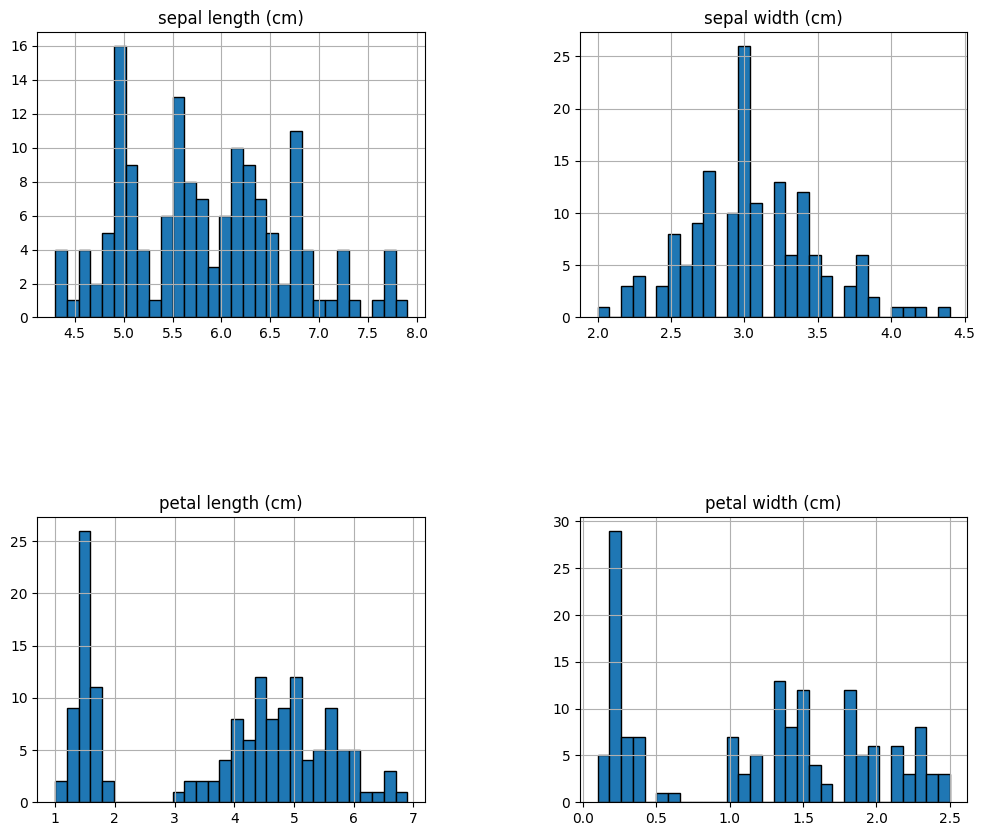

In [946]:
data.frame.hist(figsize=(12,10),bins=30,edgecolor = 'black')
plt.subplots_adjust(hspace=0.7,wspace=0.4)

<h1> Check for outliers in the dataset</h1>

In [947]:
fig = px.box(data.frame.drop(columns=['target']))
fig.show()

In [948]:
X = data.frame.drop(columns= 'target')
y = data.frame.target
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

<h1> Detect outliers</h1>

In [949]:
def find_outliers(X):
    q1 = X.quantile(0.25)
    q3 = X.quantile(0.75)
    IQR = q3 - q1
    outliers = X[((X < (q1-1.5*IQR))|(X>(q3+1.5*IQR)))]
    return outliers

outliers = find_outliers(X)
print("numbers of outliers:"+ str(len(outliers)),'\n')

print("Max ouliers values:" + str(outliers.max()),'\n')

print("Min ouliers values:" + str(outliers.min()))

numbers of outliers:150 

Max ouliers values:sepal length (cm)    NaN
sepal width (cm)     4.4
petal length (cm)    NaN
petal width (cm)     NaN
dtype: float64 

Min ouliers values:sepal length (cm)    NaN
sepal width (cm)     2.0
petal length (cm)    NaN
petal width (cm)     NaN
dtype: float64


<h1> Remove Outliers from the data</h1>

In [950]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(X, 10)
ninetieth_percentile = np.percentile(X, 90)
print("Tenth Percentile:",tenth_percentile,"and Ninetieth percentile:", ninetieth_percentile)
X = np.where(X<tenth_percentile, tenth_percentile, X)
X = np.where(X > ninetieth_percentile, ninetieth_percentile, X)
# print("Sample:", sample)
X.shape

Tenth Percentile: 1.1 and Ninetieth percentile: 6.2


(150, 4)

<h1> Scale the dataset for univariate</h1>

In [951]:
scaler = StandardScaler()
X = scaler.fit_transform(X).copy()
X

array([[-0.96458146,  1.01900435, -1.35129821, -0.89463805],
       [-1.31661849, -0.13197948, -1.35129821, -0.89463805],
       [-1.66865552,  0.32841405, -1.40898026, -0.89463805],
       [-1.84467404,  0.09821729, -1.29361616, -0.89463805],
       [-1.14059998,  1.24920112, -1.35129821, -0.89463805],
       [-0.43652592,  1.93979142, -1.17825205, -0.89463805],
       [-1.84467404,  0.78880759, -1.35129821, -0.89463805],
       [-1.14059998,  0.78880759, -1.29361616, -0.89463805],
       [-2.19671107, -0.36217625, -1.35129821, -0.89463805],
       [-1.31661849,  0.09821729, -1.29361616, -0.89463805],
       [-0.43652592,  1.47939788, -1.29361616, -0.89463805],
       [-1.49263701,  0.78880759, -1.2359341 , -0.89463805],
       [-1.49263701, -0.13197948, -1.35129821, -0.89463805],
       [-2.37272958, -0.13197948, -1.52434436, -0.89463805],
       [ 0.26754814,  2.16998818, -1.46666231, -0.89463805],
       [ 0.09152963,  3.09077525, -1.29361616, -0.89463805],
       [-0.43652592,  1.

<h1> Split the data for training and testing</h1>

In [952]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

<h1> Model selection and training</h1>

In [953]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train,y_train)
SgdClassifier = SGDClassifier()
SgdClassifier.fit(X_train,y_train)

SGDClassifier()

<h1> Support Vector Machine</h1>

In [954]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

<h1> Make prediction from X</h1>

In [955]:
svm_classifier.predict(X)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica'

<h1> Decision for classification</h1>

In [956]:
temp_scores = svm_classifier.decision_function(X)
temp_scores.round(2)

array([[ 2.23,  0.87, -0.21],
       [ 2.22,  0.92, -0.21],
       [ 2.23,  0.86, -0.2 ],
       [ 2.23,  0.88, -0.2 ],
       [ 2.23,  0.86, -0.21],
       [ 2.23,  0.88, -0.21],
       [ 2.23,  0.86, -0.2 ],
       [ 2.23,  0.87, -0.21],
       [ 2.22,  0.89, -0.2 ],
       [ 2.23,  0.91, -0.21],
       [ 2.23,  0.89, -0.21],
       [ 2.23,  0.87, -0.21],
       [ 2.23,  0.9 , -0.21],
       [ 2.22,  0.87, -0.19],
       [ 2.22,  0.88, -0.2 ],
       [ 2.22,  0.86, -0.19],
       [ 2.23,  0.86, -0.21],
       [ 2.23,  0.87, -0.21],
       [ 2.22,  0.94, -0.21],
       [ 2.23,  0.86, -0.2 ],
       [ 2.22,  0.99, -0.22],
       [ 2.23,  0.86, -0.21],
       [ 2.22,  0.86, -0.19],
       [ 2.23,  0.92, -0.22],
       [ 2.23,  0.88, -0.21],
       [ 2.22,  0.98, -0.21],
       [ 2.23,  0.88, -0.21],
       [ 2.23,  0.89, -0.22],
       [ 2.23,  0.89, -0.22],
       [ 2.23,  0.88, -0.21],
       [ 2.23,  0.9 , -0.21],
       [ 2.23,  0.95, -0.22],
       [ 2.23,  0.86, -0.2 ],
       [ 2

The highest score is 0.99 is the one corresponding to the 247 class

In [957]:
# use argmax to get the class label
class_id = temp_scores.argmax()
class_id

317

In [958]:
svm_classifier.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<h1> 45 OVO score</h1>

In [959]:
# Let's obtain all 45 OvO scores
svm_classifier.decision_function_shape = "ovo"
temp_scores_ovo = svm_classifier.decision_function(X)
temp_scores_ovo.round(2)

array([[ 1.26,  1.13,  0.62],
       [ 0.97,  1.07,  0.66],
       [ 1.19,  1.1 ,  0.47],
       [ 1.06,  1.08,  0.47],
       [ 1.25,  1.13,  0.51],
       [ 1.14,  1.12,  0.57],
       [ 1.14,  1.05,  0.38],
       [ 1.23,  1.12,  0.62],
       [ 0.91,  1.04,  0.4 ],
       [ 1.05,  1.08,  0.66],
       [ 1.18,  1.11,  0.69],
       [ 1.19,  1.1 ,  0.52],
       [ 1.  ,  1.08,  0.59],
       [ 0.99,  0.98,  0.32],
       [ 1.04,  1.01,  0.5 ],
       [ 1.  ,  1.  ,  0.28],
       [ 1.19,  1.13,  0.49],
       [ 1.26,  1.13,  0.62],
       [ 1.  ,  1.01,  0.77],
       [ 1.18,  1.12,  0.47],
       [ 1.  ,  1.  ,  0.97],
       [ 1.22,  1.13,  0.53],
       [ 1.07,  1.  ,  0.31],
       [ 1.09,  1.07,  0.79],
       [ 1.1 ,  1.08,  0.56],
       [ 0.83,  1.02,  0.78],
       [ 1.2 ,  1.12,  0.65],
       [ 1.22,  1.11,  0.71],
       [ 1.21,  1.09,  0.73],
       [ 1.11,  1.09,  0.52],
       [ 1.03,  1.09,  0.61],
       [ 1.06,  1.01,  0.9 ],
       [ 1.08,  1.07,  0.34],
       [ 1

<h1> One vs Rest classifier based on support vector machine</h1>

In [960]:
# Let's use One vs Rest Classifier here
from sklearn.multiclass import OneVsRestClassifier

ovr_classifier = OneVsRestClassifier(SVC())
ovr_classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [961]:
ovr_classifier.predict(X)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica'

<h1> Let check the number of train classifiers</h1>

In [962]:
len(ovr_classifier.estimators_)

3

In [963]:
ovr_classifier.estimators_

[SVC(), SVC(), SVC()]

The above shows that three classifiers were successfully trained by the support vector machine

<h1> Let evaluate the support vector machine classifier performance</h1>

In [964]:
print('OVR accuracy:',cross_val_score(ovr_classifier,X_train,y_train))
print('Support vector machine classifier accuracy',cross_val_score(svm_classifier,X_train,y_train,cv=3,scoring='accuracy'))

OVR accuracy: [0.95833333 0.875      0.95833333 0.91666667 1.        ]
Support vector machine classifier accuracy [0.925 0.95  0.95 ]


Wow! the accuracy result is thesame

<h1>Error Analysis</h1>

<h3> Since the both result are thesame for the support vector machine, let us pick one them and make a cross evaluation predict to return the decision made for each classes</h3>

In [965]:
y_train_predict = cross_val_predict(svm_classifier, X_train,y_train,cv=3)
y_train_predict

array(['setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica'

<h1> Confusion Matrix</h1>

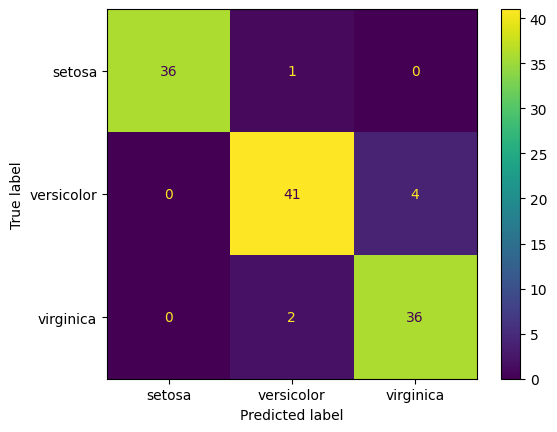

In [966]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_predict)

<h1> Stochastic Gradient Descent Classifier Implementation</h1>

In [967]:
SgdClassifier = SGDClassifier()
SgdClassifier.fit(X_train,y_train)

SGDClassifier()

<h1> Predict classes of flowers</h1>

In [968]:
SgdClassifier.predict(X)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor

<h1> Check Gradient descent accuracy</h1>

In [969]:
cross_val_score(SgdClassifier, X_train,y_train,cv=3,scoring='accuracy')

array([0.95, 0.95, 0.9 ])

In [970]:
y_train_pred = cross_val_predict(svm_classifier,X_train,y_train,cv=3)
y_train_pred

array(['setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica'

<h1> Error Analysis</h1>

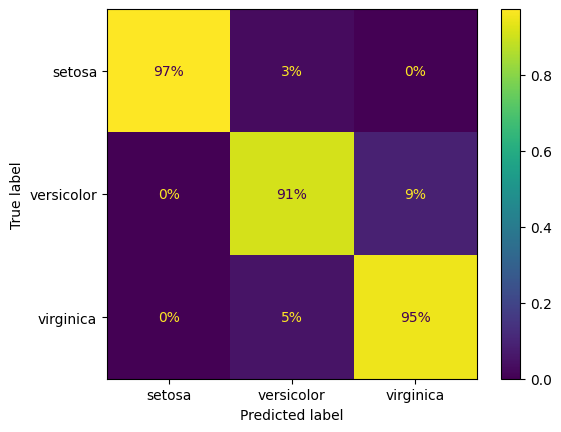

In [971]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,normalize='true',values_format=".0%")

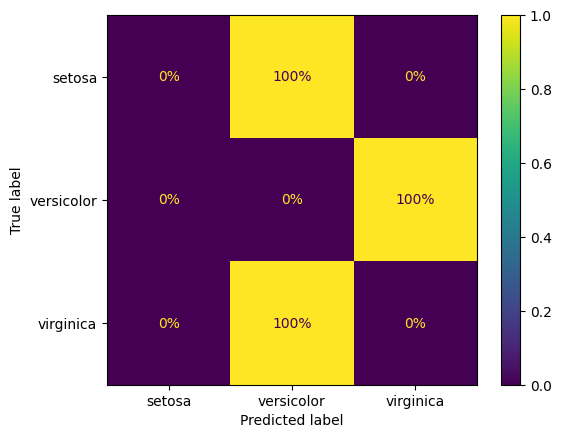

In [972]:
sample_weight =(y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred, sample_weight=sample_weight,normalize='true',values_format='.0%')

<h1> Generate the report </h1>
<h3> Prediction , Recall, Accuracy ,F1_score. etc.</h3>

In [973]:
print('Score Report for the support vector machine classifier\n',classification_report(y_train, y_train_pred),'----------------------------------------------------\n')
print("Score Report for the stochastic gradient descent classifier",classification_report(y_train,y_train_predict))

Score Report for the support vector machine classifier
               precision    recall  f1-score   support

      setosa       1.00      0.97      0.99        37
  versicolor       0.93      0.91      0.92        45
   virginica       0.90      0.95      0.92        38

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120
 ----------------------------------------------------

Score Report for the stochastic gradient descent classifier               precision    recall  f1-score   support

      setosa       1.00      0.97      0.99        37
  versicolor       0.93      0.91      0.92        45
   virginica       0.90      0.95      0.92        38

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



In [974]:
print("Accuracy score for Stochastic gradient classifier:\n",cross_val_score(SgdClassifier, X_train,y_train,cv=3,scoring='accuracy'),"\n----------------------------------------------------------")
print("Accuracy score for support vector machine classifier\n",cross_val_score(svm_classifier, X_train,y_train,cv=3,scoring='accuracy'))

Accuracy score for Stochastic gradient classifier:
 [0.95  0.95  0.925] 
----------------------------------------------------------
Accuracy score for support vector machine classifier
 [0.925 0.95  0.95 ]


<h1> Summary </h1>

<h4><justify>From  the model classifiers report, it was gathered that a test from our training dataset of 150 data point for both training and testing generated 99% accuracy with the application of stochastic gradient descent classifier while the support vector machine accuracy was about 95%. 

Wow! This is a very good performance. We have  successfully classified flowers in their various species. 

Hence this model can recongnize the three Iris classes of flower species namely; Setosa, Virginica and viscolor</justify></h4>